# Titanic dataset

#### A look at the factors that may influence the survival of a passenger. 
                                                                                             -Aparna Radhakrishnan.

RMS Titanic made its maiden voyage on 10 April 1912. It was a tragic voyage for many aboard as it hit an iceberg on the North Atlantic Ocean on 15 April 1912 and sank. The route of the journey till the sinking coordinates can be seen in the map below:
![Image](https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png)

The passengers embarked from three ports - Southamptom, Cherbourg and Queenstown. 

In [1]:
# Importing libraries and setting up the environment.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Reading in the data, checking on dimensions and at the first five rows of the data.
titanic_data = pd.read_csv('titanic_data.csv')
print titanic_data.shape
titanic_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The dataset contains 12 columns of information including name, sex, age, class and port of embarkment of 891 passengers.

### Questions

A few of the questions that can be answered using the data are as follows:

** 1. Gender - Did more females survive than males (adults)? **

** 2. Age - Did more children survive? **

** 3. Did the Class matter? **

** 4. Did the Embarkation port have any influence on the survival? **


### Analyses:

In [3]:
# Create a new column with a logical answer of whether each passenger is an adult or child. 
# Adult defined as age greater than or equal to 18.
# The passengers without missing age will be "False" in the "is_adult" column and need to be handled separately.
titanic_data['is_adult']=titanic_data['Age']>=18

# The percentage of survivors 
print titanic_data.groupby('Survived').size()*100/titanic_data.groupby('Survived').size().sum()

# Create a dataset with only the survivors.
survived_data=titanic_data[titanic_data['Survived']==1]
print " "
print survived_data.shape

Survived
0    61.616162
1    38.383838
dtype: float64
 
(342, 13)


The survival rate of the passengers in this dataset is only 38% that is 342 passengers.

#### 1. Gender -Did more females survive than males (adults)?

First a look at the total percentage of each sex in the dataset.

Sex
female    34.276206
male      65.723794
dtype: float64


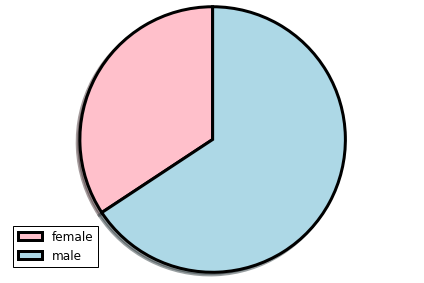

In [4]:
# Total percentage of each sex in the dataset displayed as a table and shown in the pie chart. 
sex_count=titanic_data[titanic_data['is_adult']==True].groupby('Sex').size() # since missing data in age is considered as false, only adults are considered here.
print sex_count*100/sex_count.sum()

labels = sex_count.index.values
sizes = sex_count
colors = ['pink','lightblue']
patches, texts = plt.pie(sizes, colors=colors, startangle=90, shadow=True, wedgeprops = {"linewidth":3})
plt.legend(patches, labels, loc="best")

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()


About 34% of the total number of passengers are female and 66% are males. In the pie-chart above, the females are respresented in pink and the males in blue. Further, a look at the sex of the adult survivors.

 
Percentage of Survivors Grouped by Sex
Sex
female    69.432314
male      30.567686
Name: Survived, dtype: float64
 


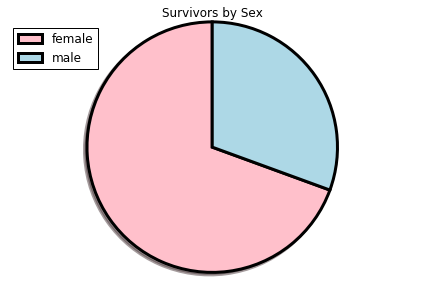

In [5]:
# Calculate numbers of individuals of each adult of each sex that survived.
# This is again displayed as table and pie chart following conventions as previously.
# Since only the adults are being looked at, there is no need to handle the missing age "False".

sex_survived_count=survived_data[survived_data['is_adult']==True].groupby(['Sex']).count()["Survived"]
print " "
print "Percentage of Survivors Grouped by Sex"
print sex_survived_count*100/sex_survived_count.sum()
print " "

labels = sex_survived_count.index.values
sizes = sex_survived_count
colors = ['pink','lightblue']
patches, texts = plt.pie(sizes, colors=colors, startangle=90, shadow=True, wedgeprops = {"linewidth":3})
plt.legend(patches, labels, loc="best")

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title('Survivors by Sex')
plt.axis('equal')
plt.tight_layout()


The absolute percentages of survivors by sex are about 69% females and 31% males respectively.

In [6]:
# The following table shows the survivors of each sex with respect to total of the same sex.
print " "
print "Relative Percentages with respect to Sex"
sex_survived_wrt_sex_percent = sex_survived_count*100/sex_count
print sex_survived_wrt_sex_percent


 
Relative Percentages with respect to Sex
Sex
female    77.184466
male      17.721519
dtype: float64


Finally, about 77% of the total female pasengers survived but only 18% of the total male passengers survived.

In conclusion, more females survived than males. This is because of the 'women and children first' protocol [1] that was followed. 

#### 2. Age - Did more children survive?

Following the 'women and children first' protocol, one would expect more children to have survived than adults. To confirm the same, the following analysis was carried out:

 
Number of Passengers that were children and adults
is_adult
False    113
True     601
dtype: int64


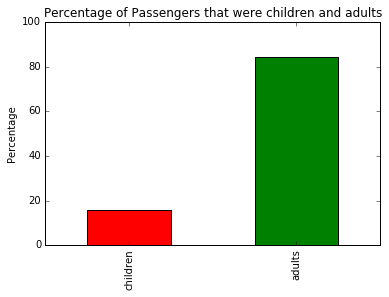

In [8]:
# Calculate numbers of passenger that are adults and children. The passengers missing age were not considered.
total_by_age = titanic_data[pd.notnull(titanic_data['Age'])].groupby('is_adult',as_index=False,group_keys=False).size()
print " "
print "Number of Passengers that were children and adults"
print total_by_age

passengers_adult_or_child = total_by_age * 100 / total_by_age.sum()

# Bar plot of the results.
passengers_adult_or_child.plot.bar(color=['red','green'])
plt.ylim(0,100)
plt.xticks([0,1],['children','adults'])
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Percentage of Passengers that were children and adults')

Looking at only passengers, where the information on age is available, only 16% of the total number of passengers are children (represented as a red bar) and 84% are adults (represented as a green bar).

 
Number of Survivors that were children and adults
is_adult
False     61
True     229
dtype: int64
 
Percentage of Survivors that were children and adults with respect to total
is_adult
False    53.982301
True     38.103161
dtype: float64


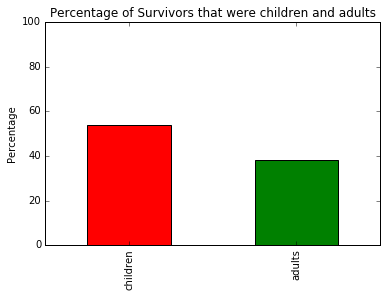

In [9]:
# Calculate numbers of survivors that are adults and children. The survivors missing age were not considered.
survivors_by_age = survived_data[pd.notnull(survived_data['Age'])].groupby('is_adult',as_index=False,group_keys=False).size()
print " "
print "Number of Survivors that were children and adults"
print survivors_by_age

# The following table shows the percentage of survivors that were children and adults with respect to total.
print " "
print "Percentage of Survivors that were children and adults with respect to total"
survivors_adult_or_child=survivors_by_age*100/total_by_age
print survivors_adult_or_child

# Bar plot of the results
survivors_adult_or_child.plot.bar(color=['red','green'])
plt.ylim(0,100)
plt.xticks([0,1],['children','adults'])
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Percentage of Survivors that were children and adults')


About 54% of the total children (represented as red bar) on board survived and only 38% of the total adults (represented as red bar) survived.

Thus, we can conclude that more children survived than adults.

#### 3. Did the Class matter?

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


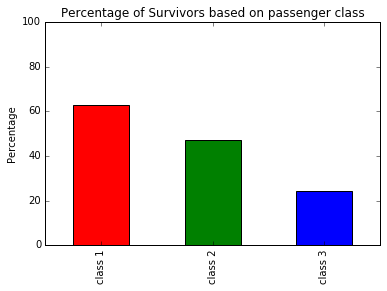

In [10]:
# Calculate total number of passengers per class in the whole dataset
total_per_class = titanic_data.groupby('Pclass').size()

# The following table shows the percentage of survivors for each class.
survivors_pclass=survived_data.groupby('Pclass').size()*100/total_per_class
print survivors_pclass

# Bar plot of results
survivors_pclass.plot.bar(color=['red','green','blue'])
plt.ylim(0,100)
plt.xticks([0,1,2],['class 1','class 2', 'class 3'])
plt.xlabel('')
plt.ylabel('Percentage')
plt.title('Percentage of Survivors based on passenger class')


The above table and graph shows a clear distinction of the percentage of survival for each of the classes. 63% of passengers in class 1 (represented as red bar) survived, 47% of passengers in class 2 (represented as blue bar) survived and only 24% of passengers in class 3 (represented as green bar) survived. 


Thus, the data points towards the survival of passengers did depend on which passenger class they were travelling. The low percentage of survival of passenger class 3 as they had to protect themselves [1] as the lower decks filled with water.

#### 4. Did the Embarkation port have any influence on the survival?

The passengers embarked from three different ports. This intutively should have no influence on their survival. In the following analyses, this is tested.

In [11]:
# Calculate the number of passengers from each port.
total_per_embarkation_port = titanic_data.groupby('Embarked').size()

# The following table shows the percentage of survivors for each port. 
obs_result= survived_data.groupby('Embarked').size()*100/total_per_embarkation_port
print obs_result


Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64


Interstingly, there is a difference in survival rates depending on whether the passenger embarked from Cherbourg or Southamptom and Queenstown. 

This was further tested using a permutation test. A 1000 permutations were carried out to test whether the above percentages are random. In each permutation, the survival information of 100 passengers are sampled from the dataset and the three ports are randomized with the same probability as present in the dataset. A p-value is calculated as the number of permutations in which a percentage greater than overall survival rate that is 38% is obtained for any one port and less than or equal to 38% for the other two ports over 1000 permutations. 

The null hypothesis is that the number of passengers that survived from each port is equal to around 38%. The alternative hypothesis is that the number of passenger that survived from one port has a greater survival rate and therfore not equal to 38%.

In [12]:
# Permutations and calculating permutation p-value
perm_results = pd.DataFrame() # creating results dataframe
seeds=range(150483,151483) # setting seeds to replicate exact results
ports=['C','Q','S'] # ports names
prob_port=(titanic_data.groupby('Embarked').size()/len(titanic_data['Embarked'])).round(2) # probability of each port

# Permutation loop - sample data, setting seed, randomizing port, calculating and storing percentages for the permutation.
for permutation in range(0,1000):
    sample_data = pd.DataFrame(titanic_data[titanic_data['Survived'].isnull()==False].sample(100,random_state=seeds[permutation])).reset_index()['Survived']
    np.random.seed(seed=seeds[permutation]) 
    random_port = []
    for i in np.random.choice(3,size=100,p=prob_port):
        random_port.append(ports[i])
    random_port=pd.DataFrame(random_port)
    perm_data =pd.concat([sample_data,random_port],axis=1,ignore_index=True)
    perm_data.columns = ['Survived','Embarked']
    perm_port_total = perm_data.groupby('Embarked').size()
    perm_port_survived = perm_data[perm_data['Survived']==1].groupby('Embarked').size()
    perm_percentage = pd.DataFrame(perm_port_survived * 100 / perm_port_total)
    perm_results = pd.concat([perm_results, perm_percentage],axis=1)

def count_if_greater_than_expected(percentage):
    countgt38 = 0
    countle38 = 0
    for percent in percentage:
        if percent > 38:
            countgt38 += 1
        else:
            countle38 += 1
    count = 0
    if countgt38 == 1 and countle38 == 2:
        count = +1
    return count

perm_results.columns=range(0,1000)
print "P-value =",perm_results.apply(count_if_greater_than_expected,axis=0).sum()/1000.0
print

P-value = 0.364



The permutation p-value to get the observed results is 0.364. Thus, the null hypothesis is rejected.

However, there is no reason for the embarkation port to increase survival rate directly. So I hypothesized that this is because of different sex ratios of the passengers embarking from each port. The following analysis is to check on the sex ratio for each port.

  Embarked     Sex          0
0        C  female  43.452381
1        C    male  56.547619
2        Q  female  46.753247
3        Q    male  53.246753
4        S  female  31.521739
5        S    male  68.478261
 


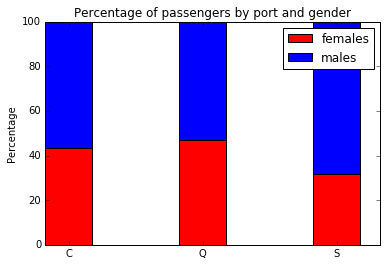

In [13]:
# The following table shows the percentage of passengers grouped by port and sex (named as gender in the variable).
port_gender_groups = (titanic_data.groupby(['Embarked','Sex']).size()*100/total_per_embarkation_port).reset_index()
print port_gender_groups

males=port_gender_groups[port_gender_groups['Sex']=='male'][0]
females=port_gender_groups[port_gender_groups['Sex']=='female'][0]

print " "

# create stacked bar plot for sex from each port.
ind=np.arange(3)
p1=plt.bar(ind,females,0.35,color='red')
p2=plt.bar(ind,males,0.35,color='blue',bottom=females)

plt.ylabel('Percentage')
plt.title('Percentage of passengers by port and gender')
plt.xticks(ind + 0.35/2.0, ('C','Q','S'))
plt.legend((p1[0], p2[0]), ('females','males'),loc='best')


Although there is a difference in the sex ratio in the passengers that embarked from Southampton, it does not explain the increased survival rate of passengers embarking from Cherbourg.

This indicates that there might be another factor influencing the increased rate of survival such as passenger class. In the following analysis, the ratio of passengers in the passenger classes embarking from each port was tested.

  Embarked Pclass          0
0        C      1  50.595238
1        C      2  10.119048
2        C      3  39.285714
3        Q      1   2.597403
4        Q      2   3.896104
5        Q      3  93.506494
6        S      1  19.720497
7        S      2  25.465839
8        S      3  54.813665
------



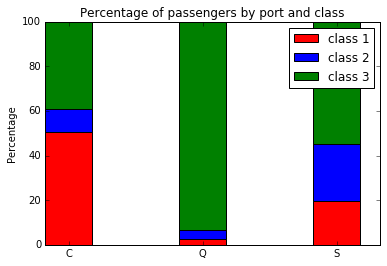

In [14]:
# The following table shows the percentage of passengers grouped by port and passenger class
port_class_groups = (titanic_data.groupby(['Embarked','Pclass'],as_index=False).size()*100/total_per_embarkation_port).transpose().reset_index()
port_class_groups.Pclass=port_class_groups.Pclass.astype(str)
print port_class_groups
print "------"
class1=port_class_groups[port_class_groups['Pclass']=='1'][0]
class2=port_class_groups[port_class_groups['Pclass']=='2'][0]
class3=port_class_groups[port_class_groups['Pclass']=='3'][0]
print 

# create a stacked bar plot for the data.
ind=np.arange(3)
p1=plt.bar(ind,class1,0.35,color='red')
p2=plt.bar(ind,class2,0.35,color='blue',bottom=class1)
p3=plt.bar(ind,class3,0.35,color='green',bottom=100-class3)  
plt.ylabel('Percentage')
plt.title('Percentage of passengers by port and class')
plt.xticks(ind + 0.35/2.0, ('C','Q','S'))
plt.legend((p1[0], p2[0], p3[0]), ('class 1','class 2','class 3'),loc='best')


The results observed is interesting. 51% of the passengers that embarked from Cherbourg were of passenger class 1 and as previously shown, there was an increased survival rate for passenger in the first class. Thus, the ratios above explain the increased survival rate of passengers that embarked from port Cherbourg. 

In conclusion, the port of embarkment had no direct influence on the survival rate. However, since there was a higher percentage of 1st class passengers from the port, the survival rate was skewed for the port.


Finally, from the questions that were tested in the above analyses, one can conclude some of the factors that affect the survival of a passenger include sex, age and passenger class.


References:
[1] https://en.wikipedia.org/wiki/RMS_Titanic#Sinking
